In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("../data/survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
data.shape

(309, 16)

In [5]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ", "_")
data.rename(columns={"fatigue_": "fatigue", "allergy_": "allergy"}, inplace=True) 

In [6]:
data.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
data.describe()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

In [9]:
data.isnull().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

In [10]:
data["lung_cancer"].unique()

array(['YES', 'NO'], dtype=object)

In [11]:
data["lung_cancer"].value_counts()

lung_cancer
YES    270
NO      39
Name: count, dtype: int64

<Axes: xlabel='lung_cancer'>

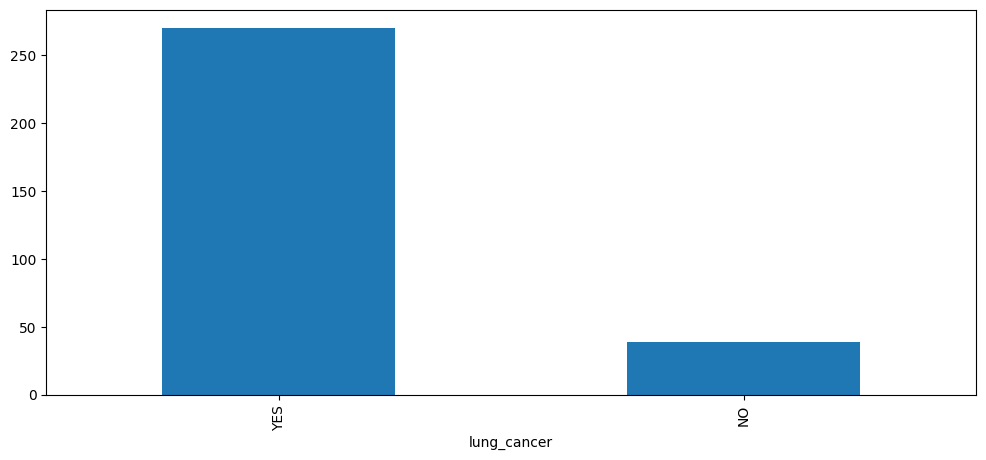

In [12]:
data["lung_cancer"].value_counts().plot.bar(figsize=(12, 5))

In [13]:
for col in data.columns:
    print(f"{col} :{data[col].unique()}")

gender :['M' 'F']
age :[69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
smoking :[1 2]
yellow_fingers :[2 1]
anxiety :[2 1]
peer_pressure :[1 2]
chronic_disease :[1 2]
fatigue :[2 1]
allergy :[1 2]
wheezing :[2 1]
alcohol_consuming :[2 1]
coughing :[2 1]
shortness_of_breath :[2 1]
swallowing_difficulty :[2 1]
chest_pain :[2 1]
lung_cancer :['YES' 'NO']


In [14]:
data["smoking"] = data["smoking"].apply(lambda x: 1 if x==2 else 0)
data["yellow_fingers"] = data["yellow_fingers"].apply(lambda x: 1 if x==2 else 0)
data["anxiety"] = data["anxiety"].apply(lambda x: 1 if x==2 else 0)
data["peer_pressure"] = data["peer_pressure"].apply(lambda x: 1 if x==2 else 0)
main_data["chronic_disease"] = main_data["chronic_disease"].apply(lambda x: 1 if x == "Yes" else 0)
data["fatigue"] = data["fatigue"].apply(lambda x: 1 if x==2 else 0)
data["allergy"] = data["allergy"].apply(lambda x: 1 if x==2 else 0)
data["wheezing"] = data["wheezing"].apply(lambda x: 1 if x==2 else 0)
data["alcohol_consuming"] = data["alcohol_consuming"].apply(lambda x: 1 if x==2 else 0)
data["coughing"] = data["coughing"].apply(lambda x: 1 if x==2 else 0)
data["shortness_of_breath"] = data["shortness_of_breath"].apply(lambda x: 1 if x==2 else 0)
data["swallowing_difficulty"] = data["swallowing_difficulty"].apply(lambda x: 1 if x==2 else 0)
data["chest_pain"] = data["chest_pain"].apply(lambda x: 1 if x==2 else 0)

In [15]:
data.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,0,1,1,0,1,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,2,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,1,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,1,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,1,0,0,1,0,1,1,0,0,NO


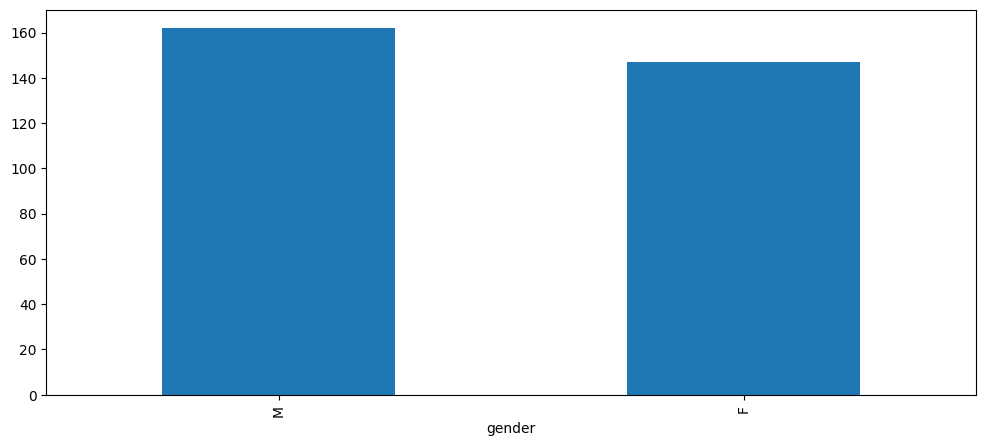

In [16]:
data["gender"].value_counts().plot.bar(figsize=(12, 5));

In [17]:
data["gender"] = data["gender"].apply(lambda x: 1 if x=="M" else 0)

In [18]:
data["gender"].unique()

array([1, 0])

In [19]:
data.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,1,69,0,1,1,0,1,1,0,1,1,1,1,1,1,YES
1,1,74,1,0,0,0,2,1,1,0,0,0,1,1,1,YES
2,0,59,0,0,0,1,1,1,0,1,0,1,1,0,1,NO
3,1,63,1,1,1,0,1,0,0,0,1,0,0,1,1,NO
4,0,63,0,1,0,0,1,0,0,1,0,1,1,0,0,NO


In [20]:
data['lung_cancer'] = LabelEncoder().fit_transform(data['lung_cancer'])

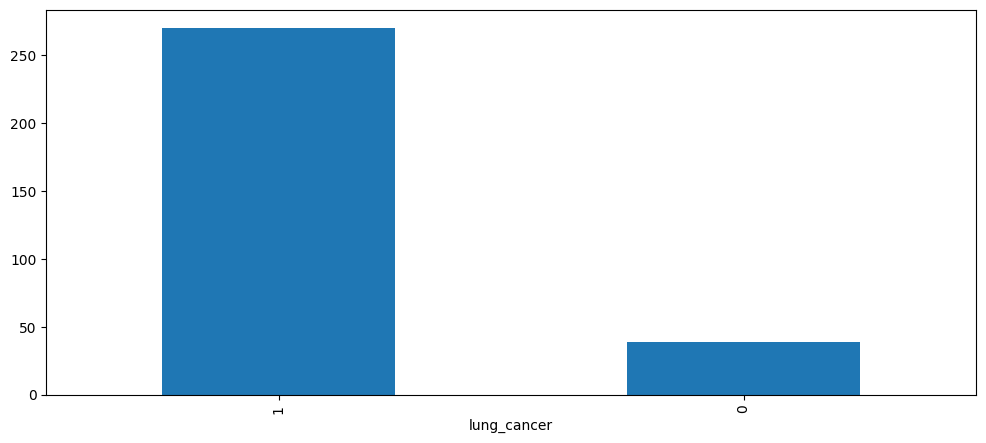

In [21]:
data["lung_cancer"].value_counts().plot.bar(figsize=(12, 5));

In [22]:
X = data.drop(columns=['lung_cancer'])
y = data['lung_cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [23]:
"""Random Oversampling"""

train_data = pd.concat([X_train, y_train], axis=1)

majority_class = train_data[train_data['lung_cancer'] == 1]
minority_class = train_data[train_data['lung_cancer'] == 0]

oversampled_minority = resample(minority_class, 
                                replace=True, 
                                n_samples=len(majority_class), 
                                random_state=42)

oversampled_data = pd.concat([majority_class, oversampled_minority])
X_oversampled = oversampled_data.drop(columns=['lung_cancer'])
y_oversampled = oversampled_data['lung_cancer']

print("Oversampled class distribution:", Counter(y_oversampled))

Oversampled class distribution: Counter({1: 189, 0: 189})


In [24]:
"""Random Under Sampling"""

undersampled_majority = resample(majority_class, 
                                 replace=False, 
                                 n_samples=len(minority_class), 
                                 random_state=42)

undersampled_data = pd.concat([undersampled_majority, minority_class])
X_undersampled = undersampled_data.drop(columns=['lung_cancer'])
y_undersampled = undersampled_data['lung_cancer']

print("Undersampled class distribution:", Counter(y_undersampled))

Undersampled class distribution: Counter({1: 27, 0: 27})


In [25]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("SMOTE class distribution:", Counter(y_smote))

SMOTE class distribution: Counter({1: 189, 0: 189})


d:\FREELANCE_PROJECTS\lung-cancer-prediction\env-lung\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\FREELANCE_PROJECTS\lung-cancer-prediction\env-lung\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [28]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Report: {lr_accuracy}")
print(classification_report(y_test, lr_predictions, target_names=['NO', 'YES']))

Logistic Regression Report: 0.8709677419354839
              precision    recall  f1-score   support

          NO       0.50      1.00      0.67        12
         YES       1.00      0.85      0.92        81

    accuracy                           0.87        93
   macro avg       0.75      0.93      0.79        93
weighted avg       0.94      0.87      0.89        93



In [104]:
brf = BalancedRandomForestClassifier(random_state=42, n_estimators=100)
brf.fit(X_train, y_train)

brf_predictions = brf.predict(X_test)
print("Balanced Random Forest Report:")
print(classification_report(y_test, brf_predictions, target_names=['NO', 'YES']))

d:\FREELANCE_PROJECTS\lung-cancer-prediction\env-lung\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
d:\FREELANCE_PROJECTS\lung-cancer-prediction\env-lung\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
d:\FREELANCE_PROJECTS\lung-cancer-prediction\env-lung\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to

Balanced Random Forest Report:
              precision    recall  f1-score   support

          NO       0.48      1.00      0.65        12
         YES       1.00      0.84      0.91        81

    accuracy                           0.86        93
   macro avg       0.74      0.92      0.78        93
weighted avg       0.93      0.86      0.88        93



d:\FREELANCE_PROJECTS\lung-cancer-prediction\env-lung\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\FREELANCE_PROJECTS\lung-cancer-prediction\env-lung\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
d:\FREELANCE_PROJECTS\lung-cancer-prediction\env-lung\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
d:\FREELANCE_PROJECTS\lung-cancer-prediction\env-lung\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\FREEL

In [108]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)

rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,rf_predictions )}")

Accuracy: 0.9247311827956989


In [110]:
X_test

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
237,0,54,1,1,1,1,2,1,0,1,0,1,0,1,1
41,1,63,0,0,0,1,1,1,1,1,1,0,0,1,0
274,1,56,1,0,0,0,2,0,1,1,1,1,1,0,1
187,1,55,1,0,0,0,1,1,0,0,0,0,0,0,0
285,0,58,1,1,1,1,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0,51,1,1,1,1,1,1,1,0,0,0,1,1,0
217,0,56,1,1,1,1,2,0,1,1,1,0,0,1,1
240,0,70,1,0,0,1,2,0,1,0,0,0,1,0,0
257,1,64,1,0,0,0,1,0,1,1,1,1,0,0,1


In [29]:
X_test

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
237,0,54,1,1,1,1,2,1,0,1,0,1,0,1,1
41,1,63,0,0,0,1,1,1,1,1,1,0,0,1,0
274,1,56,1,0,0,0,2,0,1,1,1,1,1,0,1
187,1,55,1,0,0,0,1,1,0,0,0,0,0,0,0
285,0,58,1,1,1,1,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0,51,1,1,1,1,1,1,1,0,0,0,1,1,0
217,0,56,1,1,1,1,2,0,1,1,1,0,0,1,1
240,0,70,1,0,0,1,2,0,1,0,0,0,1,0,0
257,1,64,1,0,0,0,1,0,1,1,1,1,0,0,1
